<a href="https://colab.research.google.com/github/oly2/CS412_HW/blob/main/Project_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fuzzy c means

In [ ]:
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("train.csv");
column_means = df.mean()
df_full = df.fillna(round(column_means))

In [ ]:
df_full.isnull().sum(axis = 0)

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 72, dtype: int64

In [ ]:
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

In [ ]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal     # for generating pdf

In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 14.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
fcm = FCM(n_clusters=5)
fcm.fit(dfn)

In [ ]:
fcm_centers

array([[8.29433692e+01, 1.77547173e+00, 5.34774813e+01, 5.44367463e+03,
        1.22330434e+00, 1.18051589e+00, 1.41351991e+00, 1.04481953e+00,
        1.16081261e+01, 1.25379154e+00, 1.02456464e+00, 2.30164471e+00,
        2.28598518e+00, 5.73240448e+00, 5.70016296e+00, 1.96443605e+03,
        1.98298042e+03, 1.13323455e+00, 3.22557990e+00, 3.68280649e+00,
        1.86465715e+00, 6.48687458e+01, 1.73608013e+00, 1.94831229e+00,
        1.82014939e+00, 1.74142666e+00, 2.03420312e+00, 5.11995730e+00,
        2.70008690e+00, 3.49711603e+02, 3.09244050e+00, 2.64749485e+01,
        5.08449019e+02, 8.84635570e+02, 2.39120965e+00, 8.91472109e-01,
        1.22084566e+00, 9.69941856e+02, 2.68303250e+02, 9.31760663e+00,
        1.24756271e+03, 3.68594482e-01, 4.56149230e-02, 1.40349870e+00,
        2.58019659e-01, 2.43351319e+00, 1.04819679e+00, 1.73592179e+00,
        5.60608381e+00, 1.15928014e+00, 3.91847138e-01, 1.87936346e+00,
        1.66398197e+00, 1.97630913e+03, 2.29993085e+00, 1.462544

In [ ]:
fcm_labels

array([1, 1, 1, ..., 1, 1, 1])

FileNotFoundError: ignored

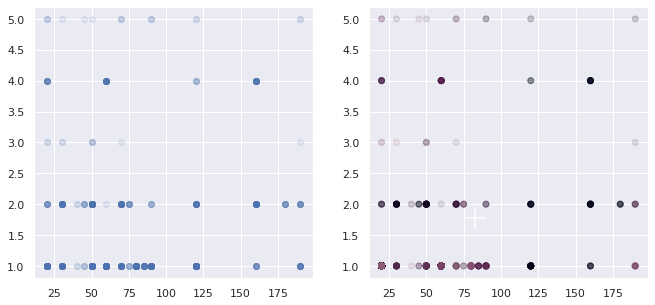

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(dfn)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(dfn[:,0], dfn[:,1], alpha=.1)
axes[1].scatter(dfn[:,0], dfn[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:1,0], fcm_centers[:1,1], marker="+", s=500, c='w')
plt.savefig('images/basic-clustering-output.jpg')
plt.show()

## kmeans

In [ ]:
df=df.select_dtypes(include=[np.number])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   LotFrontage    1460 non-null   float64 
 2   LotArea        1460 non-null   int64   
 3   OverallQual    1460 non-null   int64   
 4   OverallCond    1460 non-null   int64   
 5   YearBuilt      1460 non-null   int64   
 6   YearRemodAdd   1460 non-null   int64   
 7   MasVnrArea     1460 non-null   float64 
 8   BsmtFinSF1     1460 non-null   int64   
 9   BsmtFinSF2     1460 non-null   int64   
 10  BsmtUnfSF      1460 non-null   int64   
 11  TotalBsmtSF    1460 non-null   int64   
 12  1stFlrSF       1460 non-null   int64   
 13  2ndFlrSF       1460 non-null   int64   
 14  LowQualFinSF   1460 non-null   int64   
 15  GrLivArea      1460 non-null   int64   
 16  BsmtFullBath   1460 non-null   int64   
 17  BsmtHalfBath   1460 non-null   in

In [ ]:
#bining saleprice
df['target']=pd.qcut(df['SalePrice'], q=15,precision=0)
df=df.drop(['SalePrice'], axis=1)
#df.head()

In [ ]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,"(208247.0, 230000.0]"
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,"(179280.0, 190000.0]"
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,"(208247.0, 230000.0]"
3,70,60.000,9550,7,5,1915,1970,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000,3,642,0,35,272,0,0,0,0,2,2006,"(139700.0, 147000.0]"
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000,3,836,192,84,0,0,0,0,0,12,2008,"(230000.0, 260000.0]"


In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

target=df['target']
target_encoded=le.fit_transform(target)
features=df.iloc[:,0:(len(df.columns)-2)]
features = scaler.fit_transform(features)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3) # 70% training and 30% test

Text(0, 0.5, 'WCSS')

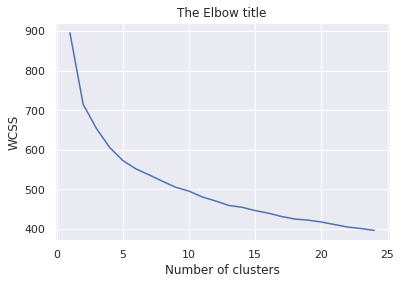

In [ ]:
wcss=[]
for i in range(1,25):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(X_train, y_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

#For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 
#WCSS is the sum of squared distance between each point and the centroid in a cluster. 
number_clusters = range(1,25)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.06621004566210045


In [ ]:
dfmatrix=df.to_numpy()

In [ ]:
scaler = MinMaxScaler()
dfmatrix = scaler.fit_transform(dfmatrix)

Text(0, 0.5, 'WCSS')

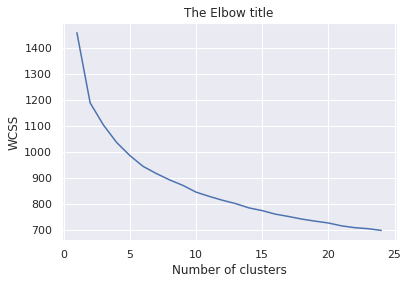

In [ ]:
wcss=[]
for i in range(1,25):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(dfmatrix)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

#For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 
#WCSS is the sum of squared distance between each point and the centroid in a cluster. 
number_clusters = range(1,25)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#the elbow is around 8, then train the model on the dataset with a number of clusters 8.
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(dfmatrix)
kmeans.cluster_centers_

array([[ 2.45158933e-01,  1.88377436e-01,  4.66205615e-02,
         6.47342995e-01,  5.38043478e-01,  8.68530021e-01,
         7.80538302e-01,  8.00776398e-02,  7.94104441e-02,
         1.26499069e-02,  2.14413341e-01,  1.58381027e-01,
         1.63974870e-01,  4.18362835e-01,  4.31090648e-03,
         2.97849958e-01,  1.53209110e-01,  1.55279503e-02,
         6.52173913e-01,  5.06211180e-01,  4.06832298e-01,
         3.45755694e-01,  4.63250518e-01,  2.65010352e-01,
         8.54601920e-01,  5.32608696e-01,  3.90559707e-01,
         1.64128804e-01,  1.20590005e-01,  2.21779638e-02,
         1.18721573e-02,  3.05124224e-02,  1.73472348e-18,
         1.77519535e-03,  4.46640316e-01,  7.45341615e-01,
         2.62502353e-01],
       [ 1.52324685e-01,  1.68062451e-01,  4.06006890e-02,
         4.67734110e-01,  5.56768559e-01,  5.69331055e-01,
         1.76491994e-01,  3.67576419e-02,  7.11309146e-02,
         3.60128694e-02,  2.07042232e-01,  1.53550983e-01,
         1.70180424e-01,  1.00

## KNN

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#bining saleprice
df['target']=pd.qcut(df['SalePrice'], q=15,precision=0)
#df.head()

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

target=df['target']
target_encoded=le.fit_transform(target)
features=dfn[:,0:71]
features = scalar.fit_transform(features)

NameError: ignored

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3) # 70% training and 30% test

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2100456621004566


# feature importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [ ]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

## pick the most important features

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3) # 70% training and 30% test


In [ ]:
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df=pd.read_csv("train.csv");
df = df.fillna(round(df.mean()))
#df = df.select_dtypes(include=[np.number])

columns = list(df.columns)
features = columns[:len(columns)-1]
class_labels = list(df[columns[-1]])
df_x = df[features]

In [ ]:
y = np.array(class_labels)
X = df_x
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=bd4acbebaf72d73a967819f3a0abd1fb25c470d3c80a4ec369e3c67bcc50e264
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

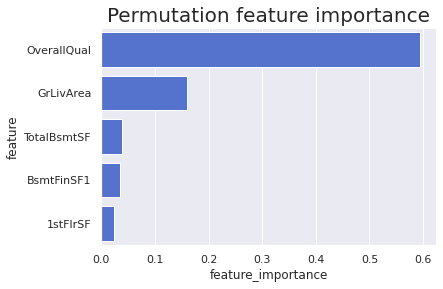

In [ ]:
var_imp_plot(perm_imp_rfpimp[:5], 'Permutation feature importance')

## Kmeans

In [ ]:
df=df.iloc[:1200,:]

In [ ]:
selected_col = ['OverallQual','GrLivArea','BsmtFinSF1','TotalBsmtSF','SalePrice']
[df.columns.get_loc(c) for c in selected_col if c in df]

[3, 15, 8, 11, 36]

In [ ]:
dfmatrix=df.to_numpy()[:,[df.columns.get_loc(c) for c in selected_col if c in df]]

In [ ]:
scaler = MinMaxScaler()
dfmatrix = scaler.fit_transform(dfmatrix)

Text(0, 0.5, 'WCSS')

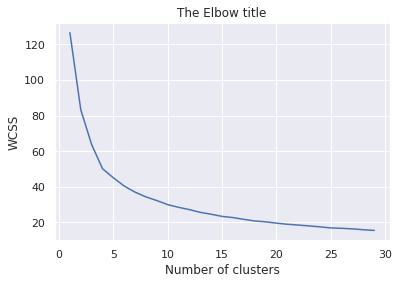

In [ ]:
wcss=[]
for i in range(1,30):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(dfmatrix)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(dfmatrix)
kmeans.cluster_centers_.shape

(10, 5)

In [ ]:
centers=kmeans.cluster_centers_

In [ ]:
centers

array([[0.33333333, 0.19617976, 0.00636062, 0.0463064 , 0.08616188],
       [0.61591221, 0.30082854, 0.02291325, 0.24507675, 0.18888183],
       [0.46657446, 0.17346443, 0.27592627, 0.30306246, 0.14160719],
       [0.79444444, 0.48068095, 0.0389823 , 0.44244126, 0.38798521],
       [0.79468599, 0.39411561, 0.55000481, 0.51200873, 0.40176177],
       [0.65565566, 0.27088858, 0.0211911 , 0.4525608 , 0.22447274],
       [0.54241338, 0.27517917, 0.48129698, 0.43697972, 0.20806504],
       [0.92592593, 0.70617739, 0.77207473, 0.77625286, 0.71473777],
       [0.62379227, 0.32835875, 0.26064352, 0.30795011, 0.23193991],
       [0.42666667, 0.18619876, 0.05374115, 0.25817686, 0.10838937]])

In [ ]:
averprice_clusters = scaler.inverse_transform(centers)[:,4]

In [ ]:
averprice_clusters

array([ 96945.16666667, 170913.80864198, 136871.34024896, 314288.15      ,
       324208.65217391, 196542.81981982, 184727.6344086 , 549582.66666667,
       201919.92934783, 112951.185     ])

## Obtain the k closest clusters of each single point by the distance formula

In [ ]:
df=df.iloc[1200:,:]

In [ ]:
from scipy.spatial import distance
dist_set=[]
for i in range(len(df)):
    for j in range(10):
        dist_set.append(distance.euclidean(centers[j,:4],dfmatrix[i,:4] ))

In [ ]:
Sj=np.array_split(dist_set,len(df))

## The price of a particular property is derived from the average price of these clusters

In [ ]:
#get the k nearest centers for each point
dist_sort_set=[]
for item in Sj:
    dist_sort_set.append([np.where(np.unique(np.sort(item))==x)[0][0] for x in item])

In [ ]:
dist_sort_set=np.array(dist_sort_set)
for i in range(len(dist_sort_set)):
    dist_sort_set[i][dist_sort_set[i] > 3] = 4  #Set a threshold to select the nearest cluster center: 3
    dist_sort_set[i][dist_sort_set[i] < 4] = 1
    dist_sort_set[i][dist_sort_set[i] == 4] = 0

In [ ]:
dist_sort_set

array([[0, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1]])

In [ ]:
for i in range(len(df)):
    for j in range(10):
        if dist_sort_set[i][j]==1:
          if j==0:
            dist_sort_set[i][j]=averprice_clusters[0]
          elif j==1:
            dist_sort_set[i][j]=averprice_clusters[1]
          elif j==2:
            dist_sort_set[i][j]=averprice_clusters[2]
          elif j==3:
            dist_sort_set[i][j]=averprice_clusters[3]
          elif j==4:
            dist_sort_set[i][j]=averprice_clusters[4]
          elif j==5:
            dist_sort_set[i][j]=averprice_clusters[5]
          elif j==6:
            dist_sort_set[i][j]=averprice_clusters[6]
          elif j==7:
            dist_sort_set[i][j]=averprice_clusters[7]
          elif j==8:
            dist_sort_set[i][j]=averprice_clusters[8]
          elif j==9:
            dist_sort_set[i][j]=averprice_clusters[9]  


In [ ]:
final_prices=[]
for i in range(len(df)):
    final_prices.append((sum(dist_sort_set[i]))/4)

In [ ]:
final_prices_pd = pd.DataFrame(final_prices)
df_pd = pd.DataFrame(df)

In [ ]:
final_prices=np.array(final_prices).reshape(len(df),1)
df=np.concatenate((df, final_prices), axis=1)

In [ ]:
columns.append('AverPrice')

In [ ]:
df_pd = pd.DataFrame(df,columns = [columns])
df_pd.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AverPrice
0,20.0,71.0,9353.0,4.0,5.0,1970.0,1970.0,0.0,0.0,0.0,864.0,864.0,864.0,0.0,0.0,864.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1972.0,1.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,116050.0,173607.50
1,60.0,80.0,10400.0,7.0,5.0,1998.0,1998.0,0.0,0.0,0.0,866.0,866.0,866.0,913.0,0.0,1779.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,1998.0,2.0,546.0,198.0,36.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0,197900.0,211931.25
2,50.0,50.0,6000.0,5.0,8.0,1925.0,1997.0,0.0,0.0,0.0,884.0,884.0,884.0,464.0,0.0,1348.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,1.0,1960.0,1.0,216.0,0.0,0.0,208.0,0.0,0.0,0.0,0.0,5.0,2009.0,117000.0,176561.25
3,20.0,75.0,9750.0,7.0,5.0,2000.0,2001.0,171.0,0.0,0.0,1630.0,1630.0,1630.0,0.0,0.0,1630.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,2000.0,2.0,451.0,74.0,234.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,213000.0,170581.25
4,20.0,78.0,10140.0,5.0,6.0,1975.0,1975.0,0.0,788.0,0.0,268.0,1056.0,1074.0,0.0,0.0,1074.0,1.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1975.0,2.0,495.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,153500.0,259239.25


In [ ]:
df_pd.to_csv('train_new.csv',index=False)

In [ ]:
df=np.concatenate((df[:,:36], final_prices), axis=1)

In [ ]:
df_train=df

In [ ]:
scoreall=[]
for i in range(10):    
    X_train, X_test, y_train, y_test = train_test_split(df_train, class_labels[:1200], test_size=0.1)

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)
   
    scoreall.append(reg.score(df, class_labels[1200:]))

In [ ]:
# Split dataset into training set and test set
scoreall=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, class_labels, test_size=0.1)

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)
   
    scoreall.append(reg.score(X_test, y_test))

In [ ]:
sum(scoreall)/len(scoreall)

0.8600830933906606

## before use clustering

In [ ]:
df=pd.read_csv("train.csv");
df = df.fillna(round(df.mean()))
df = df.select_dtypes(include=[np.number])

In [ ]:
columns = list(df.columns)
features = columns[:len(columns)-1]
class_labels = list(df[columns[-1]])
df_x = df[features]

In [ ]:
# Split dataset into training set and test set
scoreall_old=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_x, class_labels, test_size=0.1) 

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)

    scoreall_old.append(reg.score(X_test, y_test))

In [ ]:
sum(scoreall_old)/len(scoreall_old)

0.7991863131688914

##Gower distance clustering

In [ ]:
pip install gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=a9ddecb349397bf4d595fddafa579e4920d32f48ee3a68aa3408ed58c8aaec25
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [ ]:
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df=pd.read_csv("train.csv");
column_means = df.mean()
df = df.fillna(round(column_means))

In [ ]:
missing=pd.DataFrame(df.isnull().sum())

In [ ]:
df=df.dropna(axis=1)

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

ValueError: ignored

In [ ]:
import gower
dfn=gower.gower_matrix(df)

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(dfn)

# Adding the results to a new column in the dataframe
df["cluster"] = dbscan_cluster.labels_

In [ ]:
dbscan_cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 6
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(dfn)
distances, indices = nbrs.kneighbors(dfn)
distance_desc = sorted(distances[:,5], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

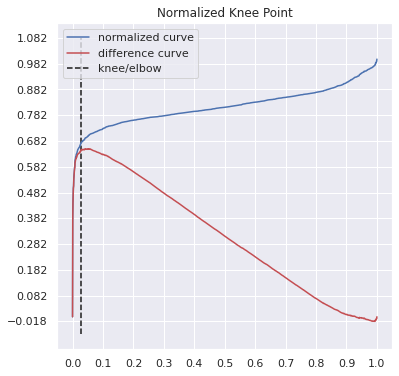

In [ ]:
kneedle.plot_knee_normalized()

In [ ]:
df.to_csv('train_class.csv',index=False)

## K-prototype clustering

In [ ]:
pip install kmodes

In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [ ]:
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 1460 rows and 80 columns


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
# Summary statistics of numerical variable
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts(),'\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Grvl    50
Pave    41
Name: Alley, dtype: int64 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neig

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [ ]:
column_means = df.mean()
df = df.fillna(round(column_means))

In [ ]:
# Check missing value
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [ ]:
df = df.fillna(df.mode().iloc[0])

### remove unused columns

In [ ]:
df.drop(['Alley'], axis = 1, inplace = True)

### cluster analysis

In [ ]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Categorical columns position  : [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33, 37, 38, 39, 40, 51, 53, 55, 56, 58, 61, 62, 63, 70, 71, 72, 76, 77]


In [ ]:
dfMatrix = df.to_numpy()

In [ ]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 15, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([13,  4, 13, ..., 11,  2,  2], dtype=uint16)

In [ ]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [ ]:
# Add the cluster to the dataframe
df['cluster_id'] = kprototype.labels_ 

In [ ]:
# Cluster centorid
kpro_centres=kprototype.cluster_centroids_

In [ ]:
pd.DataFrame(kpro_centres)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,48.983739837398375,62.63414634146341,8235.959349593495,4.861788617886178,5.682926829268292,1942.4308943089432,1968.1951219512196,16.788617886178862,190.97560975609755,19.528455284552845,530.1626016260162,740.6666666666666,921.4227642276422,200.34959349593495,16.89430894308943,1138.6666666666667,0.21138211382113822,0.016260162601626018,1.1544715447154472,0.11382113821138211,2.5528455284552845,1.0975609756097562,5.650406504065041,0.1951219512195122,1961.8292682926829,1.2032520325203253,325.3983739837398,38.51219512195122,20.821138211382113,38.86991869918699,0.0,1.3008130081300813,0.0,23.170731707317074,6.2439024390243905,2007.9105691056911,107986.80487804877,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,50.0,103.25,23089.875,9.375,5.125,2002.25,2002.875,592.875,1318.625,67.375,810.25,2196.25,2108.5,1160.75,0.0,3269.25,0.625,0.125,2.75,0.875,3.5,1.0,10.75,1.5,2002.375,3.0,815.125,210.375,82.125,0.0,0.0,71.5,69.375,0.0,4.5,2008.0,621146.375,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,60.02463054187192,67.8128078817734,9356.68472906404,5.394088669950739,5.852216748768473,1961.8916256157636,1977.576354679803,61.04433497536946,425.7586206896552,54.98522167487685,481.0689655172414,961.8128078817734,1075.512315270936,213.40886699507388,2.6403940886699506,1291.5615763546798,0.45320197044334976,0.09852216748768473,1.2758620689655173,0.24630541871921183,2.87192118226601,1.0935960591133005,6.044334975369458,0.4088669950738916,1968.512315270936,1.477832512315271,412.4039408866995,80.79802955665025,24.295566502463053,24.029556650246306,3.3300492610837438,9.285714285714286,0.0,25.123152709359605,6.330049261083744,2007.7980295566501,140855.7339901478,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,70.0,90.0,163513.5,6.25,5.75,1964.75,1984.5,205.75,1100.25,241.75,338.5,1680.5,1730.75,216.75,0.0,1947.5,1.25,0.25,2.0,0.0,3.0,1.0,6.75,2.0,1964.75,2.0,542.5,262.5,36.5,0.0,0.0,0.0,0.0,300.0,6.5,2007.75,295737.5,RL,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,64.77987421383648,70.9245283018868,9810.91823899371,6.251572327044025,5.553459119496855,1981.5094339622642,1989.2830188679245,102.0,373.28930817610063,43.74842767295598,599.125786163522,1016.1635220125786,1121.9559748427673,378.9119496855346,2.9748427672955975,1503.8427672955975,0.33962264150943394,0.1069182389937107,1.7672955974842768,0.5094339622641509,2.9056603773584904,1.0062893081761006,6.509433962264151,0.7421383647798742,1984.4716981132076,1.9559748427672956,479.1698113207547,93.15094339622641,42.886792452830186,11.226415094339623,8.377358490566039,18.855345911949687,7.69811320754717,10.062893081761006,6.069182389937107,2007.691823899371,175407.50943396226,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
5,58.71212121212121,70.0,11005.19696969697,6.575757575757576,5.333333333333333,1988.2121212121212,1994.5227272727273,98.07575757575758,404.29545454545456,35.03030303030303,692.560606060606,1131.8863636363637,1214.9545454545455,472.6363636363636,13.446969696969697,1701.0378787878788,0.4090909090909091,0.0454545454545454

In [ ]:
pd.DataFrame(kpro_centres)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,48.983739837398375,62.63414634146341,8235.959349593495,4.861788617886178,5.682926829268292,1942.4308943089432,1968.1951219512196,16.788617886178862,190.97560975609755,19.528455284552845,530.1626016260162,740.6666666666666,921.4227642276422,200.34959349593495,16.89430894308943,1138.6666666666667,0.21138211382113822,0.016260162601626018,1.1544715447154472,0.11382113821138211,2.5528455284552845,1.0975609756097562,5.650406504065041,0.1951219512195122,1961.8292682926829,1.2032520325203253,325.3983739837398,38.51219512195122,20.821138211382113,38.86991869918699,0.0,1.3008130081300813,0.0,23.170731707317074,6.2439024390243905,2007.9105691056911,107986.80487804877,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,50.0,103.25,23089.875,9.375,5.125,2002.25,2002.875,592.875,1318.625,67.375,810.25,2196.25,2108.5,1160.75,0.0,3269.25,0.625,0.125,2.75,0.875,3.5,1.0,10.75,1.5,2002.375,3.0,815.125,210.375,82.125,0.0,0.0,71.5,69.375,0.0,4.5,2008.0,621146.375,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,60.02463054187192,67.8128078817734,9356.68472906404,5.394088669950739,5.852216748768473,1961.8916256157636,1977.576354679803,61.04433497536946,425.7586206896552,54.98522167487685,481.0689655172414,961.8128078817734,1075.512315270936,213.40886699507388,2.6403940886699506,1291.5615763546798,0.45320197044334976,0.09852216748768473,1.2758620689655173,0.24630541871921183,2.87192118226601,1.0935960591133005,6.044334975369458,0.4088669950738916,1968.512315270936,1.477832512315271,412.4039408866995,80.79802955665025,24.295566502463053,24.029556650246306,3.3300492610837438,9.285714285714286,0.0,25.123152709359605,6.330049261083744,2007.7980295566501,140855.7339901478,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,70.0,90.0,163513.5,6.25,5.75,1964.75,1984.5,205.75,1100.25,241.75,338.5,1680.5,1730.75,216.75,0.0,1947.5,1.25,0.25,2.0,0.0,3.0,1.0,6.75,2.0,1964.75,2.0,542.5,262.5,36.5,0.0,0.0,0.0,0.0,300.0,6.5,2007.75,295737.5,RL,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,64.77987421383648,70.9245283018868,9810.91823899371,6.251572327044025,5.553459119496855,1981.5094339622642,1989.2830188679245,102.0,373.28930817610063,43.74842767295598,599.125786163522,1016.1635220125786,1121.9559748427673,378.9119496855346,2.9748427672955975,1503.8427672955975,0.33962264150943394,0.1069182389937107,1.7672955974842768,0.5094339622641509,2.9056603773584904,1.0062893081761006,6.509433962264151,0.7421383647798742,1984.4716981132076,1.9559748427672956,479.1698113207547,93.15094339622641,42.886792452830186,11.226415094339623,8.377358490566039,18.855345911949687,7.69811320754717,10.062893081761006,6.069182389937107,2007.691823899371,175407.50943396226,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
5,58.71212121212121,70.0,11005.19696969697,6.575757575757576,5.333333333333333,1988.2121212121212,1994.5227272727273,98.07575757575758,404.29545454545456,35.03030303030303,692.560606060606,1131.8863636363637,1214.9545454545455,472.6363636363636,13.446969696969697,1701.0378787878788,0.4090909090909091,0.0454545454545454

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,cluster_id
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,13
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,4
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,13
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12


In [ ]:
df.to_csv('train_class.csv',index=False)

In [ ]:
df_cluster = pd.DataFrame(df['cluster_id'].value_counts()).reset_index()
df_cluster['Percentage'] = df_cluster['cluster_id'] / df['cluster_id'].value_counts().sum()
df_cluster.rename(columns = {'index':'cluster_id', 'cluster_id':'Total'}, inplace = True)
df_cluster = df_cluster.sort_values('Total', ascending = True).reset_index(drop = True)
df_cluster

,cluster_id,Total,Percentage
0,3,4,0.003
1,1,8,0.005
2,7,22,0.015
3,9,41,0.028
4,10,65,0.045
5,11,82,0.056
6,6,82,0.056
7,12,100,0.068
8,13,109,0.075
9,0,123,0.084


In [ ]:
column_1 = df["cluster_id"]
column_2 = df["SalePrice"]
correlation = column_1.corr(column_2)
print(correlation)

0.2756334315184369


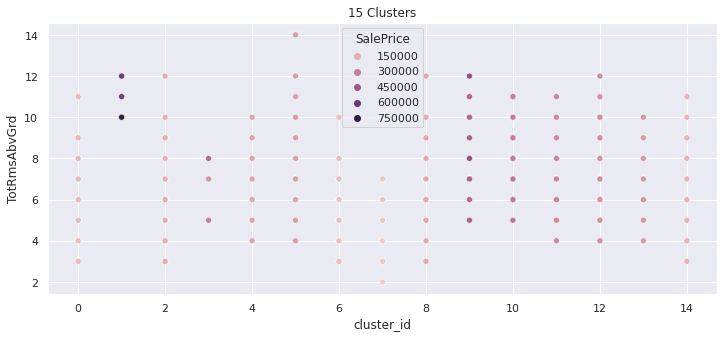

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='cluster_id',y='TotRmsAbvGrd',hue='SalePrice')
plt.title('15 Clusters')
plt.show()

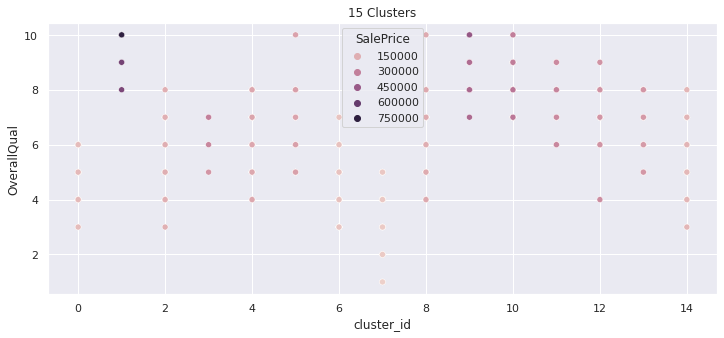

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='cluster_id',y='OverallQual',hue='SalePrice')
plt.title('15 Clusters')
plt.show()

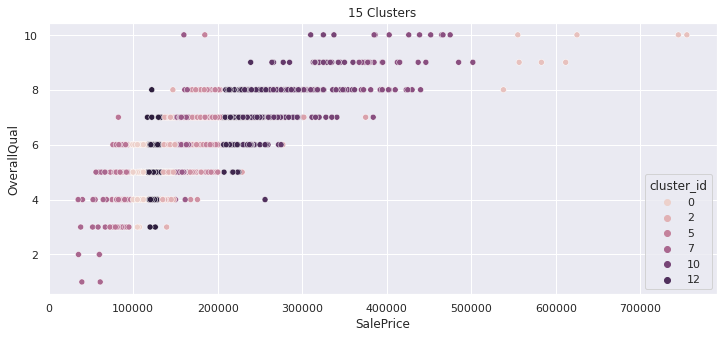

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='SalePrice',y='OverallQual',hue='cluster_id')
plt.title('15 Clusters')
plt.show()

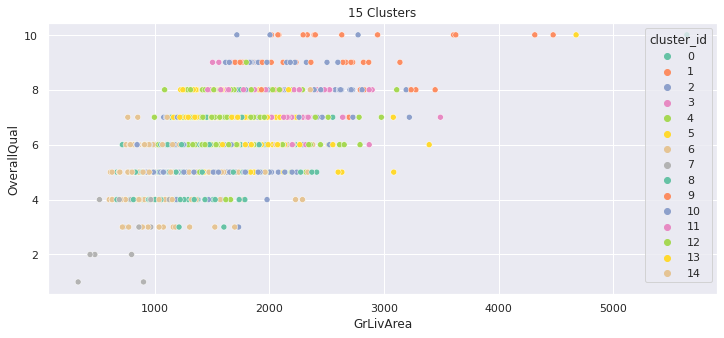

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='GrLivArea',y='OverallQual',hue='cluster_id',palette="Set2")
plt.title('15 Clusters')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df,x='SaleCondition',y='GrLivArea',hue='cluster_id',palette="Set2",)
plt.title('15 Clusters')
plt.show()

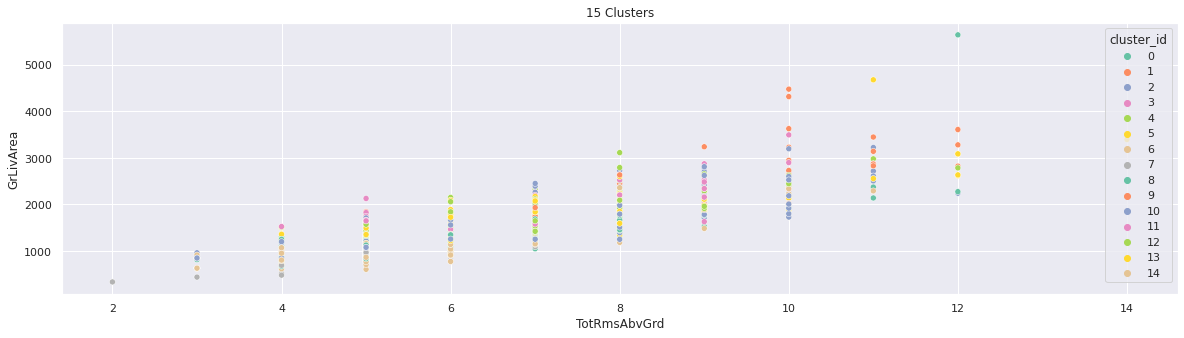

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df,x='TotRmsAbvGrd',y='GrLivArea',hue='cluster_id',palette="Set2")
plt.title('15 Clusters')
plt.show()

## compare analysis

### rand index

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])